In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima       

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\lasra\Downloads\POILWTIUSDM.csv",index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

403
               WTIUSD
DATE                 
1990-01-01  22.604348
1990-02-01  22.202500
1990-03-01  20.440455
1990-04-01  18.526667
1990-05-01  18.443043


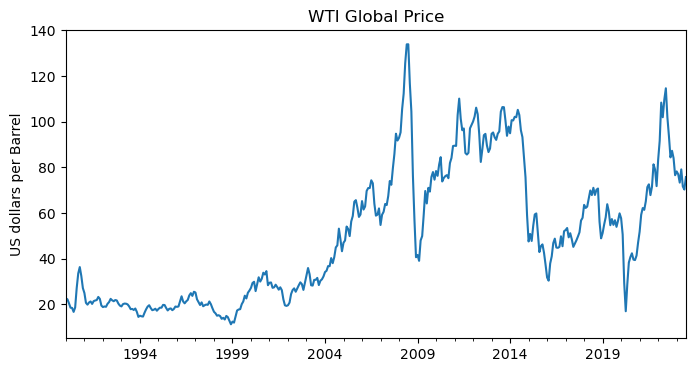

In [3]:
title='WTI Global Price'
ylabel='US dollars per Barrel'
xlabel='' 

ax = df['WTIUSD'].plot(figsize=(8,4),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

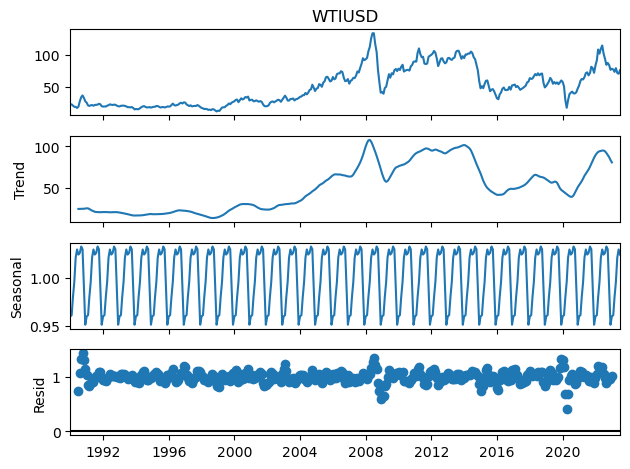

In [6]:
result = seasonal_decompose(df['WTIUSD'], model='mul')
result.plot();

In [7]:
auto_arima(df['WTIUSD'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  403
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1182.670
Date:                Fri, 01 Sep 2023   AIC                           2375.340
Time:                        11:19:54   BIC                           2395.322
Sample:                    01-01-1990   HQIC                          2383.252
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2501      0.059     21.194      0.000       1.134       1.366
ar.L2         -0.2920      0.069     -4.251      0.000      -0.427      -0.157
ar.L3         -0.0579      0.038     -1.513      0.130      -0.133       0.017
ma.L1         -0.9283      0.045    -20.426      0.000      -1.017      -0.839
sigma2        21.0150      1.016     20.691      0.000      19.024      23.006
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               142.39
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              10.51   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [10]:
model = SARIMAX(train['WTIUSD'],order=(3,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 WTIUSD   No. Observations:                  391
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1145.395
Date:                Fri, 01 Sep 2023   AIC                           2300.790
Time:                        11:21:57   BIC                           2320.621
Sample:                    01-01-1990   HQIC                          2308.651
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2562      0.067     18.779      0.000       1.125       1.387
ar.L2         -0.3041      0.071     -4.311      0.000      -0.442      -0.166
ar.L3         -0.0559      0.039     -1.430      0.153      -0.133       0.021
ma.L1         -0.9199      0.056    -16.528      0.000      -1.029      -0.811
sigma2        20.8040      1.004     20.722      0.000      18.836      22.772
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               158.54
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              11.76   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(3,1,1) Predictions')

In [12]:
predictions

2022-08-01    95.696442
2022-09-01    91.483605
2022-10-01    88.796997
2022-11-01    87.051242
2022-12-01    85.910880
2023-01-01    85.159528
2023-02-01    84.660118
2023-03-01    84.325038
2023-04-01    84.098010
2023-05-01    83.942653
2023-06-01    83.835277
2023-07-01    83.760336
Freq: MS, Name: SARIMAX(3,1,1) Predictions, dtype: float64

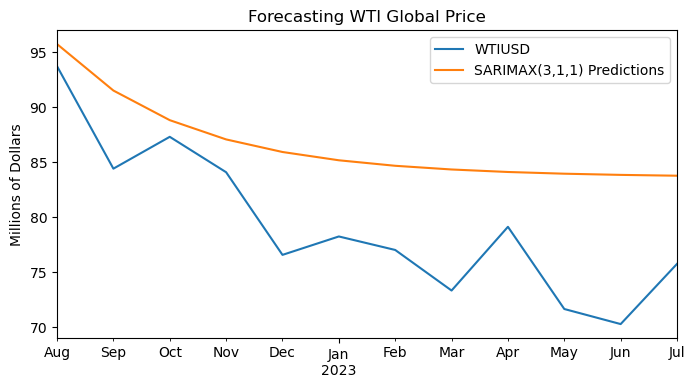

In [13]:
title='Forecasting WTI Global Price'
ylabel='Millions of Dollars'
xlabel='' 

ax = test['WTIUSD'].plot(legend=True,figsize=(8,4),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [14]:
error1 = mean_squared_error(test['WTIUSD'], predictions)
error2 = rmse(test['WTIUSD'], predictions)
print(f'SARIMAX(3,1,1) MSE Error: {error1:11.10}')
print(f'SARIMAX(3,1,1) RMSE Error: {error2:11.10}')

SARIMAX(3,1,1) MSE Error: 66.74924537
SARIMAX(3,1,1) RMSE Error: 8.170021136


In [15]:
model = SARIMAX(df['WTIUSD'],order=(3,1,1))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMAX(3,1,1)Forecast')

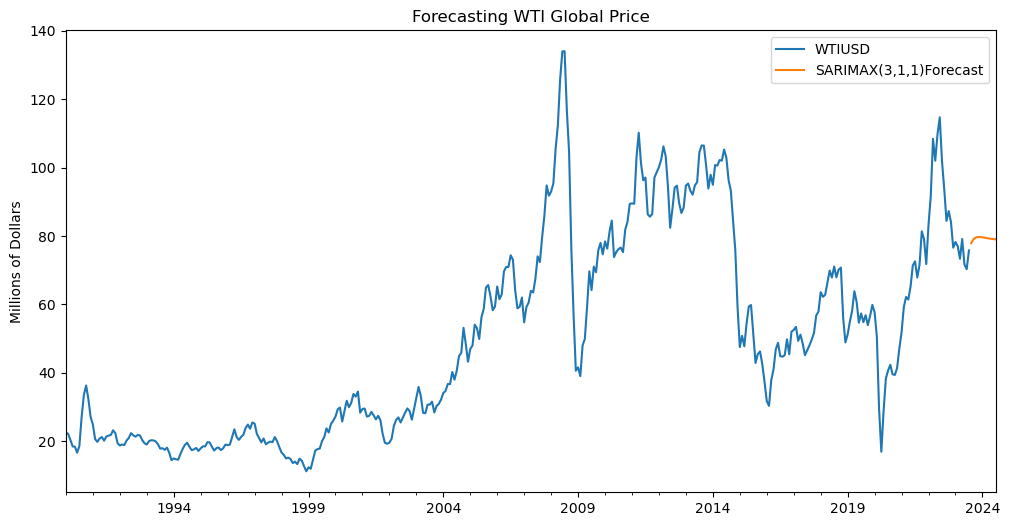

In [16]:
title='Forecasting WTI Global Price'
ylabel='Millions of Dollars'
xlabel='' 

ax = df['WTIUSD'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);